In [59]:
%%file demo
4 5
0 10 1 20 2 20 3 40 4 10
1 20 0 10 3 30 2 50 4 30
2 30 1 20 4 12 3 40 0 10
4 50 3 30 2 15 0 20 1 15

Overwriting demo


In [60]:
%%file abz7
20	15 
2	24	3	12	9	17	4	27	0	21	6	25	8	27	7	26	1	30	5	31	11	18	14	16	13	39	10	19	12	26
6	30	3	15	12	20	11	19	1	24	13	15	10	28	2	36	5	26	7	15	0	11	8	23	14	20	9	26	4	28
6	35	0	22	13	23	7	32	2	20	3	12	12	19	10	23	9	17	1	14	5	16	11	29	8	16	4	22	14	22
9	20	6	29	1	19	7	14	12	33	4	30	0	32	5	21	11	29	10	24	14	25	2	29	3	13	8	20	13	18
11	23	13	20	1	28	6	32	7	16	5	18	8	24	9	23	3	24	10	34	2	24	0	24	14	28	12	15	4	18
8	24	11	19	14	21	1	33	7	34	6	35	5	40	10	36	3	23	2	26	4	15	9	28	13	38	12	13	0	25
13	27	3	30	6	21	8	19	12	12	4	27	2	39	9	13	14	12	5	36	10	21	11	17	1	29	0	17	7	33
5	27	4	19	6	29	9	20	3	21	10	40	8	14	14	39	13	39	2	27	1	36	12	12	11	37	7	22	0	13
13	32	11	29	8	24	3	27	5	40	4	21	9	26	0	27	14	27	6	16	2	21	10	13	7	28	12	28	1	32
12	35	1	11	5	39	14	18	7	23	0	34	3	24	13	11	8	30	11	31	4	15	10	15	2	28	9	26	6	33
10	28	5	37	12	29	1	31	7	25	8	13	14	14	4	20	3	27	9	25	13	31	11	14	6	25	2	39	0	36
0	22	11	25	5	28	13	35	4	31	8	21	9	20	14	19	2	29	7	32	10	18	1	18	3	11	12	17	6	15
12	39	5	32	2	36	8	14	3	28	13	37	0	38	6	20	7	19	11	12	14	22	1	36	4	15	9	32	10	16
8	28	1	29	14	40	12	23	4	34	5	33	6	27	10	17	0	20	7	28	11	21	2	21	13	20	9	33	3	27
9	21	14	34	3	30	12	38	0	11	11	16	2	14	5	14	1	34	8	33	4	23	13	40	10	12	6	23	7	27
9	13	14	40	7	36	4	17	0	13	5	33	8	25	13	24	10	23	3	36	2	29	1	18	11	13	6	33	12	13
3	25	5	15	2	28	12	40	7	39	1	31	8	35	6	31	11	36	4	12	10	33	14	19	9	16	13	27	0	21
12	22	10	14	0	12	2	20	5	12	1	18	11	17	8	39	14	31	3	31	7	32	9	20	13	29	4	13	6	26
5	18	10	30	7	38	14	22	13	15	11	20	9	16	3	17	1	12	2	13	12	40	6	17	8	30	4	38	0	13
9	31	8	39	12	27	1	14	5	33	3	31	11	22	13	36	0	16	7	11	14	14	4	29	6	28	2	22	10	17


Overwriting abz7


In [61]:
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
import time
#from itertools import permutations, combinations

In [62]:
def load(filename):
    with open(filename) as f:
        n, m = [int(x) for x in f.readline().split()]
        jobs = np.zeros((n, m, 2), dtype=int)
        i = 0
        for line in f:
            jobs[i] = np.array([int(x) for x in line.split()]).reshape(m, 2)
            i += 1

    print(n, m)
    print(jobs)
    return n, m, jobs

In [63]:
n, m, jobs = load('abz7')

20 15
[[[ 2 24]
  [ 3 12]
  [ 9 17]
  [ 4 27]
  [ 0 21]
  [ 6 25]
  [ 8 27]
  [ 7 26]
  [ 1 30]
  [ 5 31]
  [11 18]
  [14 16]
  [13 39]
  [10 19]
  [12 26]]

 [[ 6 30]
  [ 3 15]
  [12 20]
  [11 19]
  [ 1 24]
  [13 15]
  [10 28]
  [ 2 36]
  [ 5 26]
  [ 7 15]
  [ 0 11]
  [ 8 23]
  [14 20]
  [ 9 26]
  [ 4 28]]

 [[ 6 35]
  [ 0 22]
  [13 23]
  [ 7 32]
  [ 2 20]
  [ 3 12]
  [12 19]
  [10 23]
  [ 9 17]
  [ 1 14]
  [ 5 16]
  [11 29]
  [ 8 16]
  [ 4 22]
  [14 22]]

 [[ 9 20]
  [ 6 29]
  [ 1 19]
  [ 7 14]
  [12 33]
  [ 4 30]
  [ 0 32]
  [ 5 21]
  [11 29]
  [10 24]
  [14 25]
  [ 2 29]
  [ 3 13]
  [ 8 20]
  [13 18]]

 [[11 23]
  [13 20]
  [ 1 28]
  [ 6 32]
  [ 7 16]
  [ 5 18]
  [ 8 24]
  [ 9 23]
  [ 3 24]
  [10 34]
  [ 2 24]
  [ 0 24]
  [14 28]
  [12 15]
  [ 4 18]]

 [[ 8 24]
  [11 19]
  [14 21]
  [ 1 33]
  [ 7 34]
  [ 6 35]
  [ 5 40]
  [10 36]
  [ 3 23]
  [ 2 26]
  [ 4 15]
  [ 9 28]
  [13 38]
  [12 13]
  [ 0 25]]

 [[13 27]
  [ 3 30]
  [ 6 21]
  [ 8 19]
  [12 12]
  [ 4 27]
  [ 2 39]
  [ 9 13]
  

In [64]:
#rep = [i for i in range(n)]*m
#random.shuffle(rep)
#rep = np.array([1, 2, 0, 1, 2, 3, 1, 2, 0, 3, 0, 0, 1, 0, 3, 3, 2, 2, 3, 1])
#rep = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])
rep = []
for i in range(n):
    rep.extend(np.full(m,i))
print(rep)
np.random.shuffle(rep)
#print(rep)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 1

In [65]:
mstart = np.zeros((m), dtype=int)
jend = np.zeros((n), dtype=int) #jend = np.zeros((n), dtype=int) before trying abz7
idxs = np.zeros((n), dtype=int)
makespan = 0
for e in rep:
    i = idxs[e]
    idxs[e] += 1
    midx = jobs[e, i, 0]
    tim = jobs[e, i, 1]
    #print(f"Job {e} task {i} to machine {midx} starting at {mstart[midx]} duration {time}")
    mstart[midx] = max(mstart[midx], jend[e]) + tim
    jend[e] = mstart[midx]
    if mstart[midx] > makespan:
        makespan = mstart[midx]

print(makespan)

1371


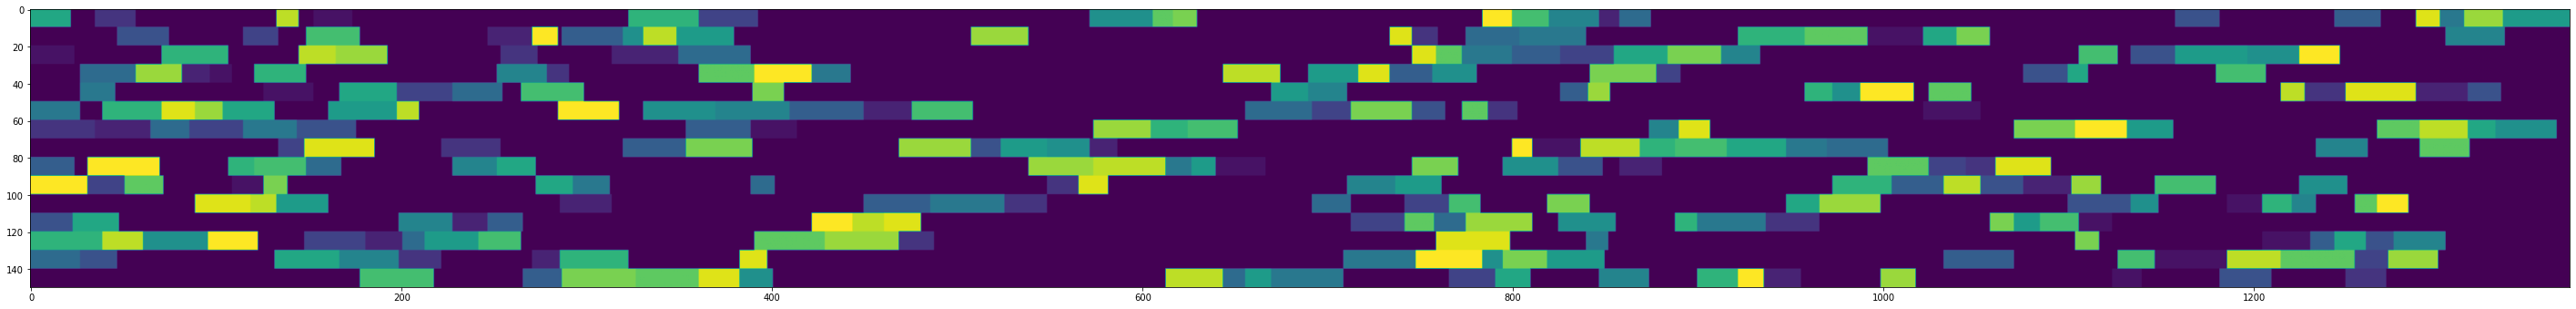

In [66]:
mstart = np.zeros((m), dtype=int)
jend = np.zeros((n), dtype=int) #jend = np.zeros((n), dtype=int) before trying abz7
idxs = np.zeros((n), dtype=int)
schedule = np.zeros((m*10, makespan))

for e in rep:
    i = idxs[e]
    idxs[e] += 1
    midx = jobs[e, i, 0]
    tim = jobs[e, i, 1]
    mstart[midx] = max(mstart[midx], jend[e])
    schedule[midx*10:(midx+1)*10, mstart[midx]:mstart[midx] + tim] = e+1
    mstart[midx] += tim
    jend[e] = mstart[midx]

plt.figure(figsize=(50,100))
plt.imshow(schedule)

# Random Sampling

In [67]:
class RandSamp(object):
    def __init__(self, data):
        self.data = data
        self.n = 0
        self.m = 0
        self.jobs = None
    
    def load(self, filename):
        with open(filename) as f:
            self.n, self.m = [int(x) for x in f.readline().split()]
            self.jobs = np.zeros((self.n, self.m, 2), dtype=int)
            i = 0
            for line in f:
                self.jobs[i] = np.array([int(x) for x in line.split()]).reshape(m, 2)
                i += 1

    def apply(self):
        np.random.shuffle(self.data)

    def evaluate(self, nj, mc):
        mstart = np.zeros((mc), dtype=int)
        jend = np.zeros((nj), dtype=int) #jend = np.zeros((n), dtype=int) before trying abz7
        idxs = np.zeros((nj), dtype=int)
        makespan = 0
        for e in rep:
            i = idxs[e]
            idxs[e] += 1
            midx = jobs[e, i, 0]
            tim = jobs[e, i, 1]
            #print(f"Job {e} task {i} to machine {midx} starting at {mstart[midx]} duration {time}")
            mstart[midx] = max(mstart[midx], jend[e]) + tim
            jend[e] = mstart[midx]
            if mstart[midx] > makespan:
                makespan = mstart[midx]
        return makespan

    def solve(self, filename, nj, mc):
        self.load(filename)
        self.apply()
        #print(n,m)
        makespan = self.evaluate(nj, mc)
        #time.sleep(1)
        return makespan


[1261, 1261, 1261, 1261, 1261, 1261, 1261, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1137, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1133, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 1096, 108

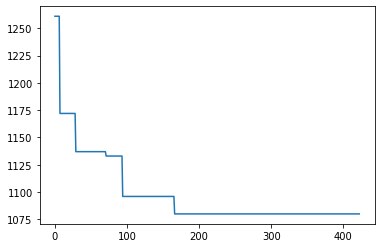

In [78]:
rsstop = datetime.datetime.now().minute + 3
rslogs = []
rssecs = []
rssecond = 0
bestmk = 1000000
while datetime.datetime.now().minute < rsstop:
    rs = RandSamp(rep)
    #print(rs.data)
    y = rs.solve('abz7', n, m)
    if y < bestmk:
        bestmk = y
    #print('y:',y)
    rslogs.append(bestmk)
    rssecs.append(rssecond)
    rssecond += 1
    time.sleep(0.4)
print(rslogs)
plt.plot(rssecs, rslogs)
plt.show()

# Algoritmo Genetico

In [68]:
# Número de individuos en cada generación
POPULATION_SIZE = 100

In [69]:
class Individual(object):
    '''
    Clase que representa al individuo en la población
    '''
    def __init__(self, chromosome, nj, nm, jo):
        self.chromosome = chromosome 
        self.fitness = self.cal_fitness(nj, nm, jo)
  
    @classmethod
    def mutated_genes(self):
        '''
        crear genes aleatorios para la mutación
        '''
        gene = random.choice([0,1,2,3])
        return gene
  
    @classmethod
    def create_gnome(self,n,m):
        '''
        crear un cromosoma o cadena de genes
        '''
        gnome = []
        for i in range(n):
            gnome.extend(np.full(m,i))
        np.random.shuffle(gnome)
        return gnome

    def mate(self, par2, nj, nm, jo):
        '''
        Realizar apareamiento y producir nueva descendencia
        '''
  
        # cromosoma para la descendencia
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):    
  
            # probabilidad aleatoria
            prob = random.random()
  
            # si prob es menor que 0.45, insertar gen
            # del padre 1 
            if prob < 0.45:
                child_chromosome.append(gp1)
  
            # si prob esta entre 0.45 y 0.90, insertar gen
            # del padre 2
            elif prob < 0.90:
                child_chromosome.append(gp2)
  
            # de lo contrario, insertar un gen aleatorio (mutado),
            # para mantener la diversidad
            else:
                child_chromosome.append(self.mutated_genes())

        unique, counts = np.unique(child_chromosome, return_counts=True)
        over = []
        below = []
        c = 0

        # verificacion de la representacion
        # procurar que todos los trabajos usen la cantidad de maquinas necesarias
        for i in np.asarray((unique, counts)).T:
            if i[1] > m:
                for j in range(i[1]-nm):
                    over.append(i[0])
                    c += 1
            elif i[1] < m:
                for j in range(nm-i[1]):
                    below.append(i[0]) 

        arr = list(np.arange(0,nj))
        missing_elements = []
        for ele in range(arr[0], arr[-1]+1):
            if ele not in child_chromosome:
                for i in range(5):
                    below.append(ele)
                
        for i in range(c):
            for j in range(len(child_chromosome)):
                if child_chromosome[j] == over[i]:
                    child_chromosome[j] = below[i]
                    break
        c = 0

        return Individual(child_chromosome, nj, nm, jo)
  
    def cal_fitness(self, nj, nm, jo):
        '''
        Calcular el makespan
        '''
        mstart = np.zeros((nm), dtype=int)
        jend = np.zeros((nj), dtype=int) #jend = np.zeros((n), dtype=int) before trying abz7
        idxs = np.zeros((nj), dtype=int)
        makespan = 0
        for e in self.chromosome:
            i = idxs[e]
            idxs[e] += 1
            midx = jo[e, i, 0]
            tim = jo[e, i, 1]
            #print(f"Job {e} task {i} to machine {midx} starting at {mstart[midx]} duration {time}")
            mstart[midx] = max(mstart[midx], jend[e]) + tim
            jend[e] = mstart[midx]
            if mstart[midx] > makespan:
                makespan = mstart[midx]
        #print(makespan)
        return makespan

In [73]:
# Código principal
def main(nj, mc, jo):
    global POPULATION_SIZE
  
    #la generación actual
    generation = 1
  
    found = False
    population = []
  
    # crear población inicial
    for _ in range(POPULATION_SIZE):
                gnome = Individual.create_gnome(nj, mc)
                population.append(Individual(gnome, nj, mc, jo))

    stop = datetime.datetime.now().minute + 3
    logs = []
    secs = []
    second = 0

    while datetime.datetime.now().minute < stop:
        
  
        # ordenar la población en orden creciente de puntuación de aptitud física
        population = sorted(population, key = lambda x:x.fitness)
  
        # nuevos descendientes para la nueva generación
        new_generation = []
  
        # 20% con el menor makespan pasa a la siguiente generación
        s = int((20*POPULATION_SIZE)/100)
        new_generation.extend(population[:s])
  
        # Del 50% con el menor makespan, se "aparearán" para producir descendencia
        s = int((80*POPULATION_SIZE)/100)
        for _ in range(s):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2, nj, mc, jo)
            new_generation.append(child)
  
        population = new_generation
  
        #print("Generación: {}\tRep: {}\tFitness: {}".\
        #      format(generation,
        #      "".join(map(str, population[0].chromosome)),
        #      population[0].fitness))

        print("Generacion: "+str(generation), "Fitness: "+str(population[0].fitness))

        generation += 1
        logs.append(population[0].fitness)
        secs.append(second + 1)
        second += 1
        time.sleep(0.2)
  
      
    print("Generación: {}\tRep: {}\tFitness: {}".\
          format(generation,
          "".join(map(str, population[0].chromosome)),
          population[0].fitness))
    print(population[0].chromosome)
    plt.plot(secs, logs)
    plt.show()

    return logs, secs, population[0].chromosome

Generacion: 1 Fitness: 1152
Generacion: 2 Fitness: 1127
Generacion: 3 Fitness: 1127
Generacion: 4 Fitness: 1127
Generacion: 5 Fitness: 1127
Generacion: 6 Fitness: 1127
Generacion: 7 Fitness: 1127
Generacion: 8 Fitness: 1127
Generacion: 9 Fitness: 1127
Generacion: 10 Fitness: 1127
Generacion: 11 Fitness: 1127
Generacion: 12 Fitness: 1127
Generacion: 13 Fitness: 1127
Generacion: 14 Fitness: 1127
Generacion: 15 Fitness: 1127
Generacion: 16 Fitness: 1127
Generacion: 17 Fitness: 1127
Generacion: 18 Fitness: 1127
Generacion: 19 Fitness: 1127
Generacion: 20 Fitness: 1127
Generacion: 21 Fitness: 1127
Generacion: 22 Fitness: 1127
Generacion: 23 Fitness: 1127
Generacion: 24 Fitness: 1127
Generacion: 25 Fitness: 1127
Generacion: 26 Fitness: 1127
Generacion: 27 Fitness: 1127
Generacion: 28 Fitness: 1127
Generacion: 29 Fitness: 1127
Generacion: 30 Fitness: 1127
Generacion: 31 Fitness: 1127
Generacion: 32 Fitness: 1127
Generacion: 33 Fitness: 1127
Generacion: 34 Fitness: 1127
Generacion: 35 Fitness:

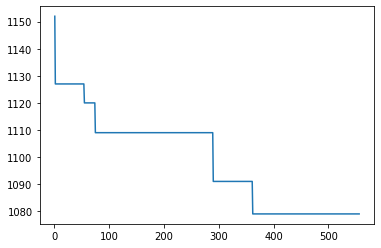

In [75]:
logs, secs, best = main(n, m, jobs)

# Comparison

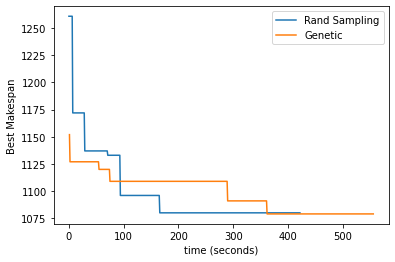

In [79]:
plt.plot(rssecs, rslogs)
plt.plot(secs, logs)
plt.legend(['Rand Sampling', 'Genetic'])
plt.xlabel("time (seconds)")
plt.ylabel("Best Makespan")
plt.show()